In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_excel("HousePricePrediction.xlsx")

In [3]:
dataset.head(5)


,Id,MSSubClass,MSZoning,LotArea,LotConfig,BldgType,OverallCond,YearBuilt,YearRemodAdd,Exterior1st,BsmtFinSF2,TotalBsmtSF,SalePrice
0,0,60,RL,8450,Inside,1Fam,5,2003,2003,VinylSd,0.0,856.0,208500.0
1,1,20,RL,9600,FR2,1Fam,8,1976,1976,MetalSd,0.0,1262.0,181500.0
2,2,60,RL,11250,Inside,1Fam,5,2001,2002,VinylSd,0.0,920.0,223500.0
3,3,70,RL,9550,Corner,1Fam,5,1915,1970,Wd Sdng,0.0,756.0,140000.0
4,4,60,RL,14260,FR2,1Fam,5,2000,2000,VinylSd,0.0,1145.0,250000.0


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2919 non-null   int64  
 1   MSSubClass    2919 non-null   int64  
 2   MSZoning      2915 non-null   object 
 3   LotArea       2919 non-null   int64  
 4   LotConfig     2919 non-null   object 
 5   BldgType      2919 non-null   object 
 6   OverallCond   2919 non-null   int64  
 7   YearBuilt     2919 non-null   int64  
 8   YearRemodAdd  2919 non-null   int64  
 9   Exterior1st   2918 non-null   object 
 10  BsmtFinSF2    2918 non-null   float64
 11  TotalBsmtSF   2918 non-null   float64
 12  SalePrice     1460 non-null   float64
dtypes: float64(3), int64(6), object(4)
memory usage: 296.6+ KB


In [4]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))

int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))

fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 4
Integer variables: 0
Float variables: 3


In [9]:
dataset.drop(['Id'],
             axis=1,
             inplace=True)

In [10]:
dataset['SalePrice'] = dataset['SalePrice'].fillna(
  dataset['SalePrice'].mean()) 

In [11]:
new_dataset = dataset.dropna()


In [12]:
new_dataset.isnull().sum()


MSSubClass      0
MSZoning        0
LotArea         0
LotConfig       0
BldgType        0
OverallCond     0
YearBuilt       0
YearRemodAdd    0
Exterior1st     0
BsmtFinSF2      0
TotalBsmtSF     0
SalePrice       0
dtype: int64

In [18]:
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))

fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))

Categorical variables: 4
Integer variables: 0
Float variables: 3


# Distribution of SalePrice

C:\Users\khand\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'SalePrice Distribution')

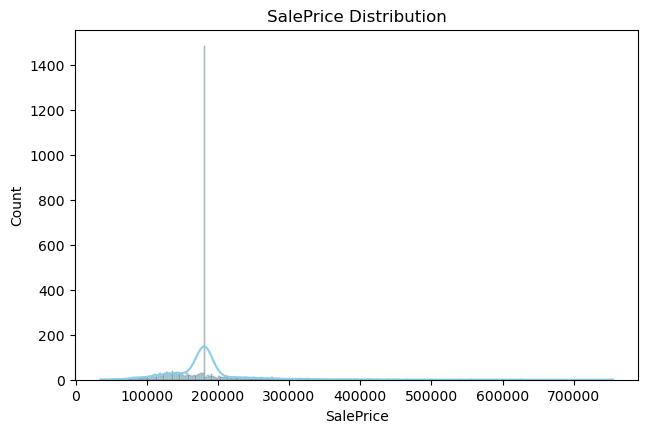

In [19]:
plt.figure(figsize=(16, 10))
plt.subplot(2, 2, 1)
sns.histplot(dataset['SalePrice'], kde=True, color='skyblue')
plt.title("SalePrice Distribution")

# Correlation Heatmap (Top 10 Correlated Features with SalePrice)

Text(0.5, 1.0, 'Top Correlated Features with SalePrice')

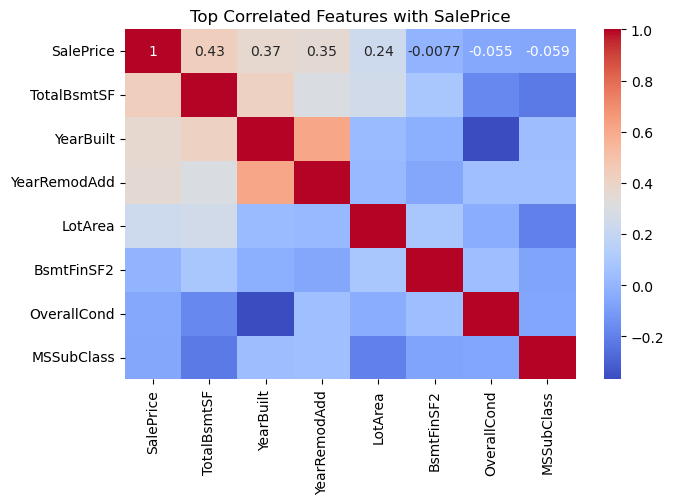

In [21]:
plt.figure(figsize=(16, 10))
plt.subplot(2, 2, 2)
correlation_matrix = dataset.corr(numeric_only=True)
top_corr_features = correlation_matrix['SalePrice'].sort_values(ascending=False).head(10)
sns.heatmap(dataset[top_corr_features.index].corr(), annot=True, cmap='coolwarm')
plt.title("Top Correlated Features with SalePrice")

# Boxplot of SalePrice by OverallCond (if exists)

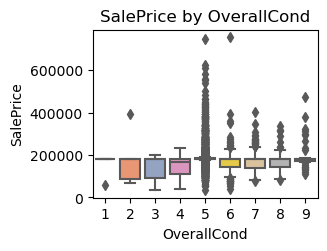

In [23]:
if 'OverallCond' in dataset.columns:
    plt.subplot(2, 2, 3)
    sns.boxplot(x='OverallCond', y='SalePrice', data=dataset, palette='Set2')
    plt.title("SalePrice by OverallCond")

# Scatter Plot: LotArea vs SalePrice

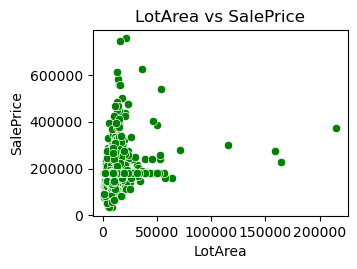

In [25]:
if 'LotArea' in dataset.columns:
    plt.subplot(2, 2, 4)
    sns.scatterplot(x='LotArea', y='SalePrice', data=dataset, color='green')
    plt.title("LotArea vs SalePrice")

plt.tight_layout()
plt.show()

# Countplot for Categorical Variables

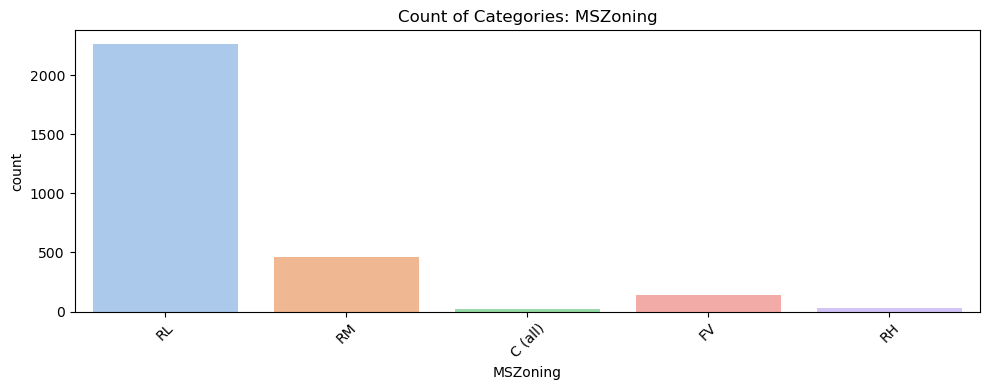

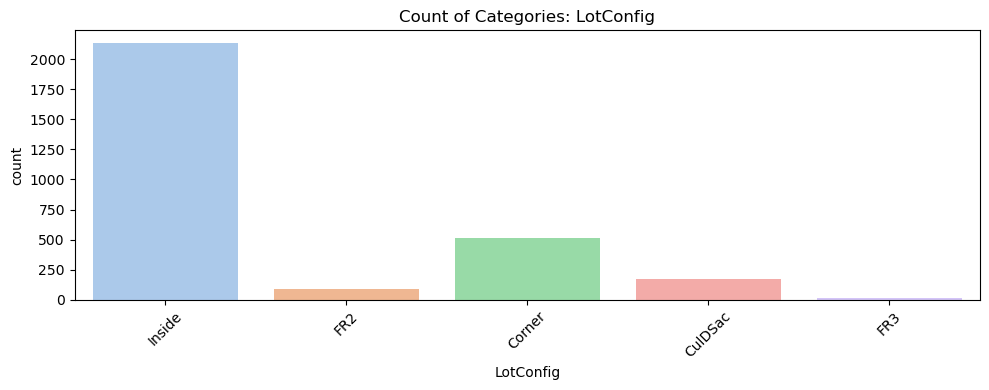

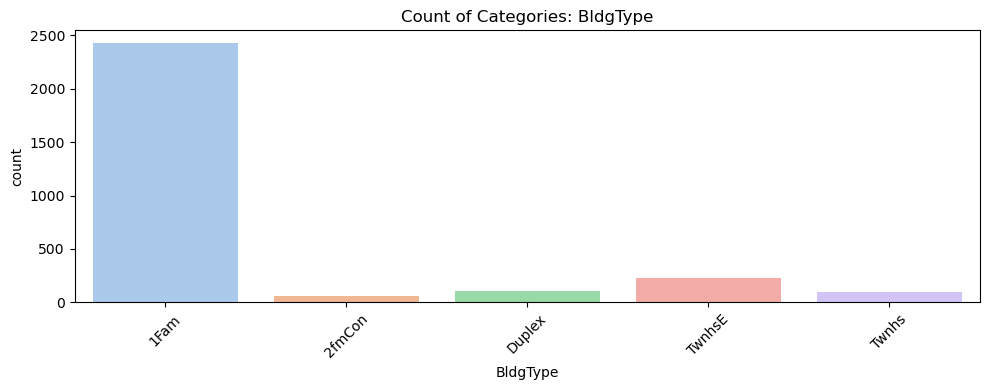

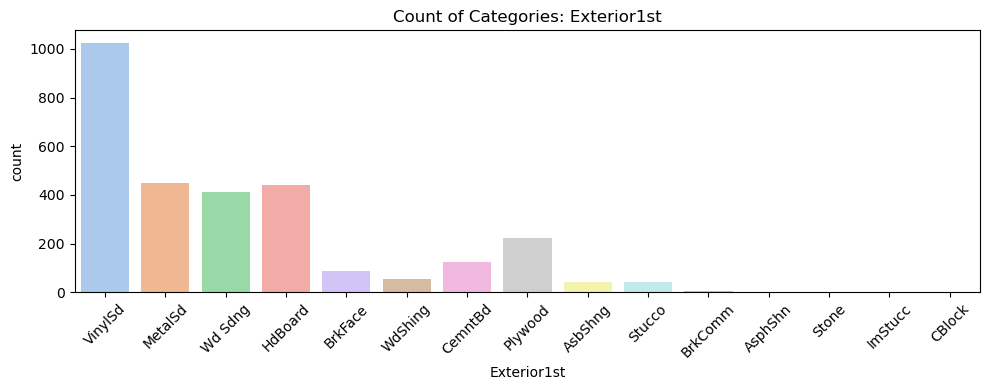

In [31]:
for col in object_cols[:5]:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=col, data=dataset, palette='pastel')
    plt.title(f"Count of Categories: {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Pairplot for Top Correlated Features

C:\Users\khand\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\khand\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\khand\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\khand\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

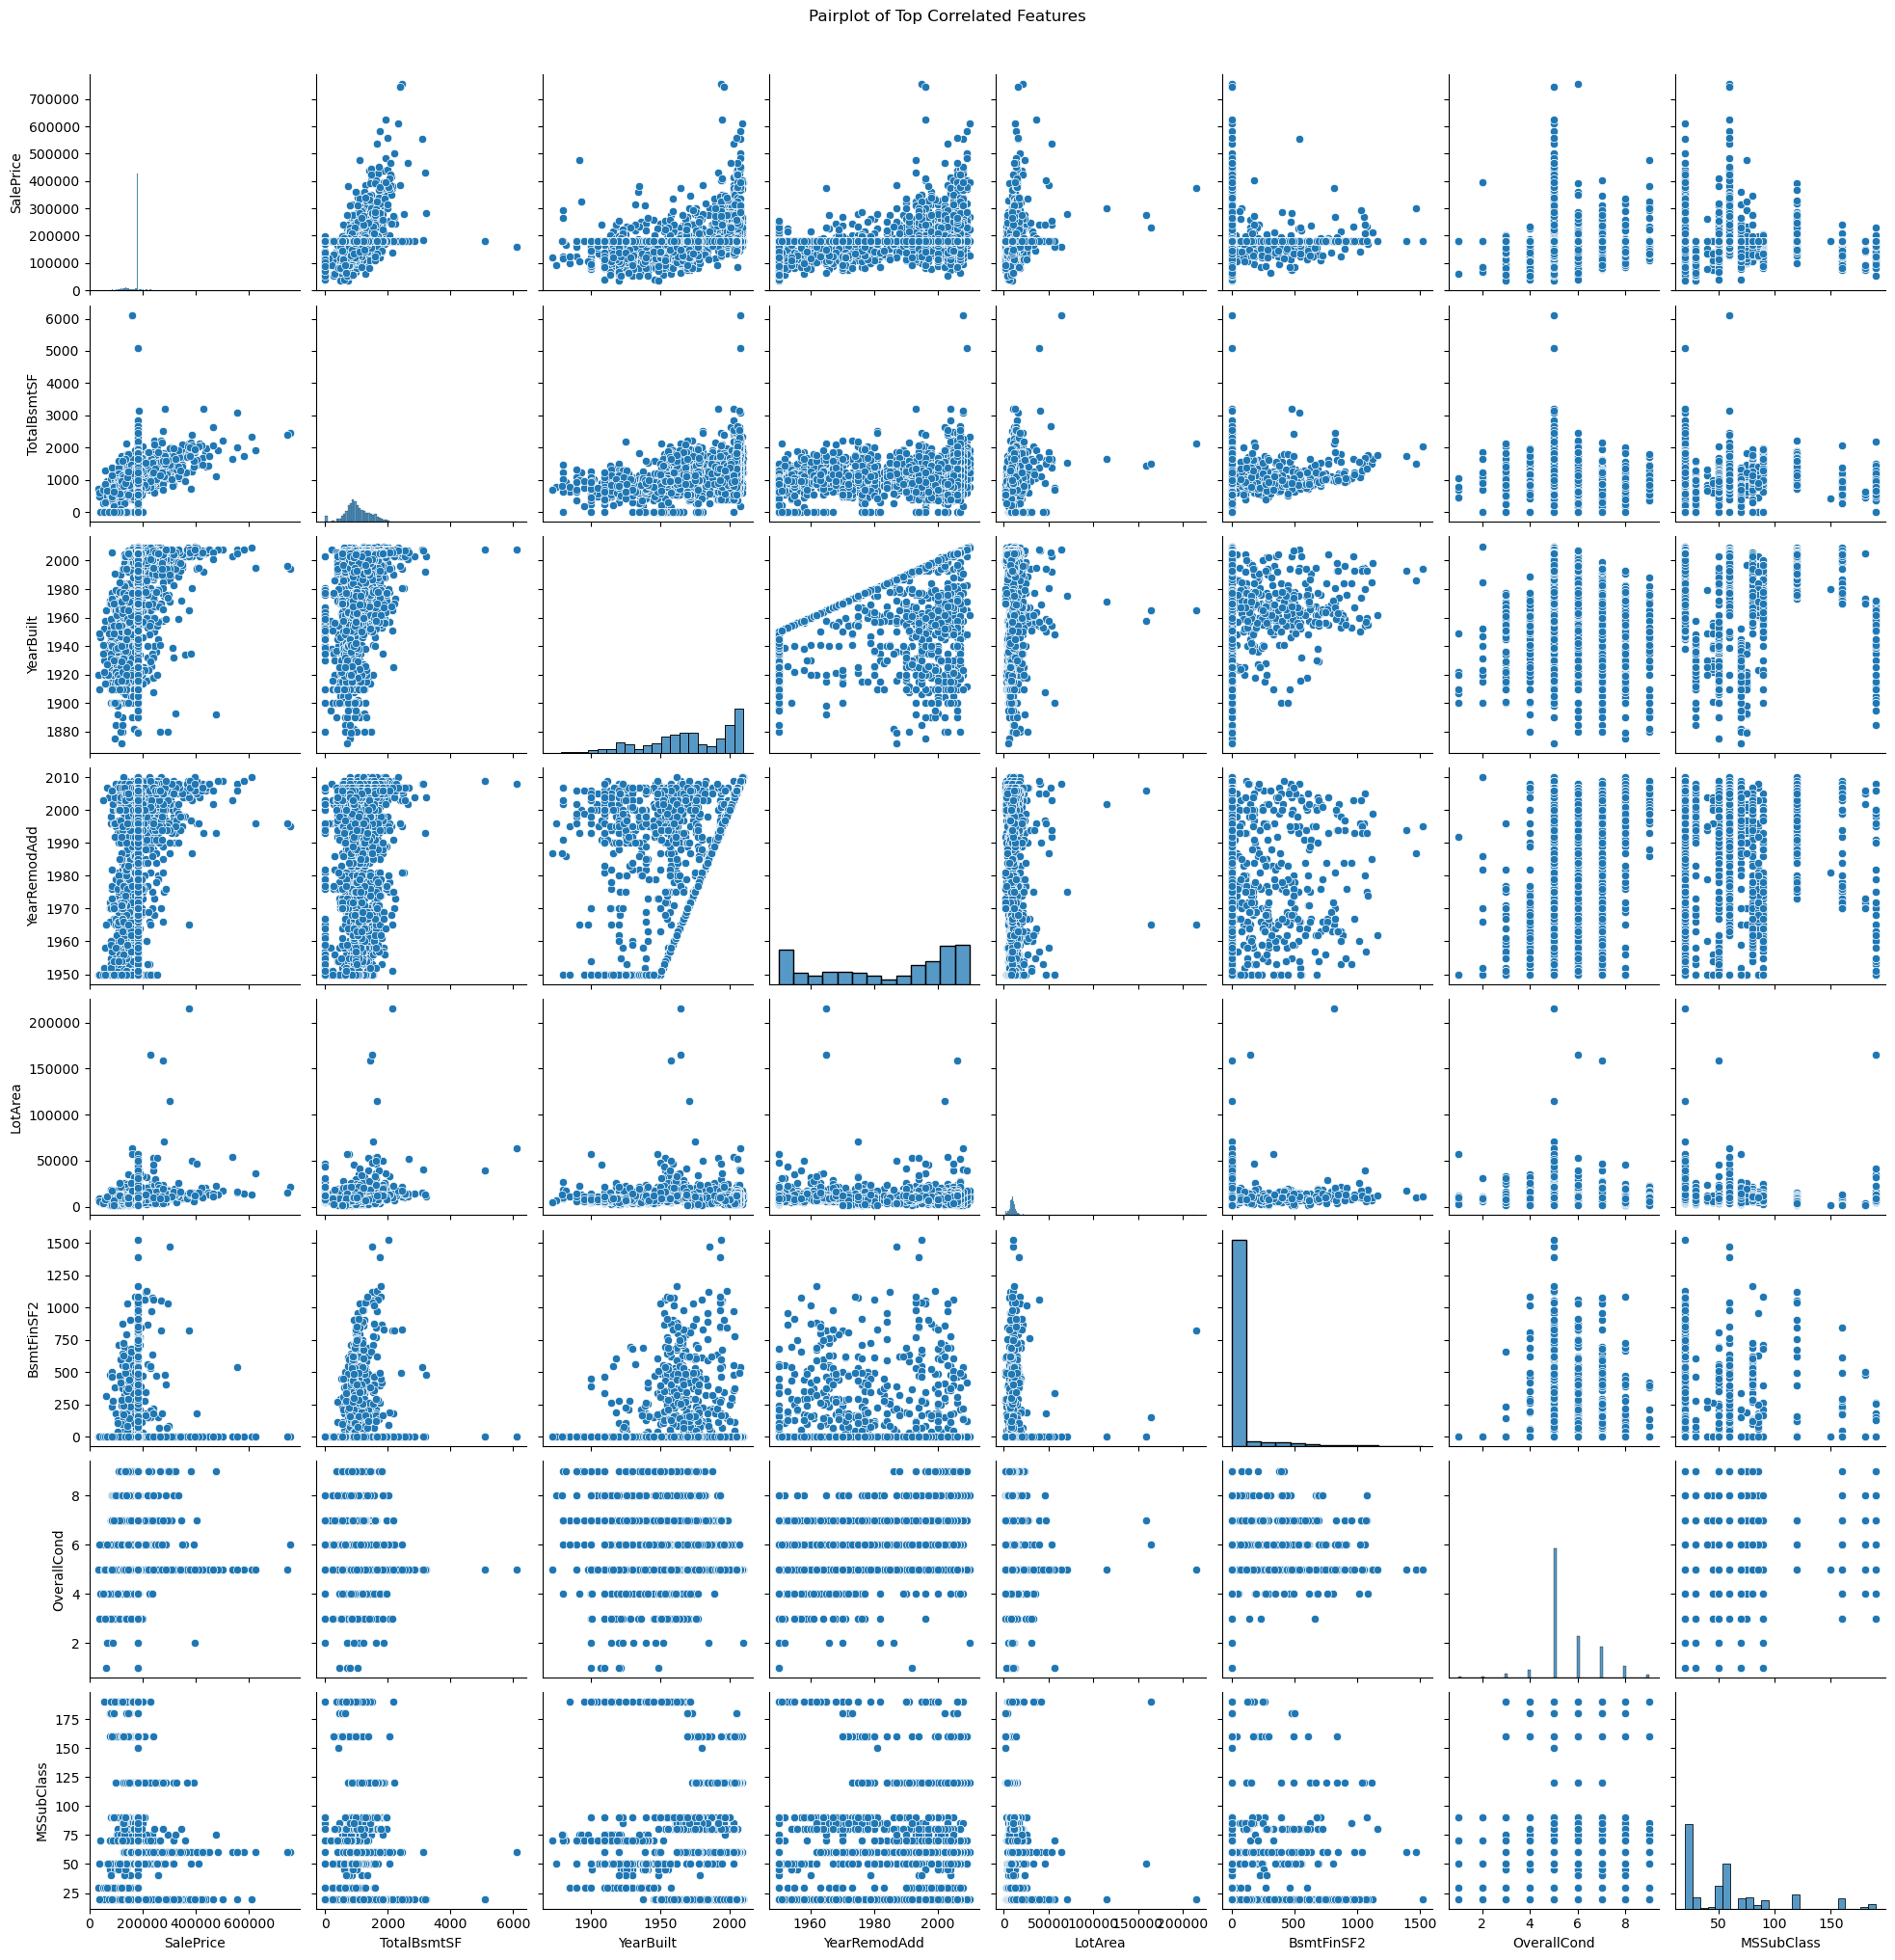

In [27]:
sns.pairplot(dataset[top_corr_features.index])
plt.suptitle("Pairplot of Top Correlated Features", y=1.02)
plt.show()

# Violin Plot: SalePrice by BldgType (if exists)

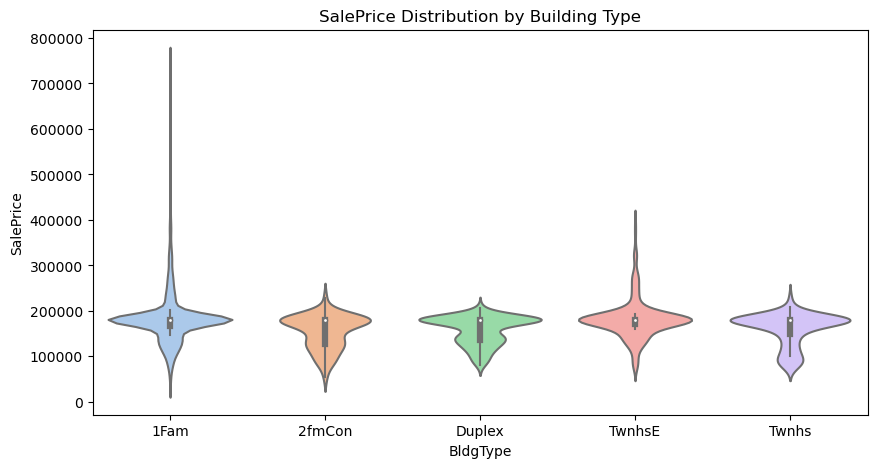

In [29]:
if 'BldgType' in dataset.columns:
    plt.figure(figsize=(10, 5))
    sns.violinplot(x='BldgType', y='SalePrice', data=dataset, palette='pastel')
    plt.title("SalePrice Distribution by Building Type")
    plt.show()

# Average SalePrice by Neighborhood

In [32]:
if 'Neighborhood' in dataset.columns:
    plt.figure(figsize=(14, 6))
    neighborhood_avg = dataset.groupby('Neighborhood')['SalePrice'].mean().sort_values(ascending=False)
    sns.barplot(x=neighborhood_avg.index, y=neighborhood_avg.values, palette='viridis')
    plt.xticks(rotation=45, ha='right')
    plt.ylabel("Average SalePrice")
    plt.title("Average SalePrice by Neighborhood")
    plt.tight_layout()
    plt.show()